In [1]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

Lets start our exercise with EDA 
import the file into a dataframe 

In [3]:
st.write("""

## EDA of beers.csv!

""")

df=pd.read_csv("data/beers.csv")
df
st.subheader('The original Dataset of beers.csv')
st.write(df)
# original dataset of each column


2021-07-22 16:02:32.983 
  command:

    streamlit run C:\Users\User\anaconda3\envs\AI_M1\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
columns=df.columns.values
def dataset():
    column = st.sidebar.selectbox('Select The column',columns, 3)
    return column
df[dataset()]
st.write(df[dataset()])

In [5]:
df.isnull().sum()

Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

create a new dataset eliminating null values from df

In [11]:
abv_new = df['abv'].dropna()
ibu_new = df['ibu'].dropna()
# print(abv_new,ibu_new)
df['ibu'][0]

nan

In [6]:
df_new=df.dropna()
df_new
# st.subheader('The new Dataset of beers.csv after removing null values')
# st.write(df_new)


2021-07-22 16:02:45.644 NumExpr defaulting to 8 threads.


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
14,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0
...,...,...,...,...,...,...,...,...
2398,2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2399,2399,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0
2400,2400,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0


In [63]:
df_new['style'].iloc[2]

'Winter Warmer'

In [116]:
df_new['ounces'].value_counts()
df_new['name'].value_counts()

Nonstop Hef Hop           12
Dale's Pale Ale            6
Longboard Island Lager     4
Boston Lager               3
1327 Pod's ESB             3
                          ..
Aprè Shred                 1
Grisette                   1
Farm Girl Saison           1
Weissenheimer              1
Cache La Porter            1
Name: name, Length: 1326, dtype: int64

In [7]:
beer_styles=df_new['style'].values
def style_data():
    value = st.sidebar.selectbox('Select the style of beers',beer_styles, 3)
    case_value =df_new.loc[df['style'] == value]
    return case_value
case_value= style_data()
case_value.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,1246.588235,0.054974,44.941176,1355.261438,241.385621,13.009150
std,670.098152,0.006229,11.542961,762.080556,150.827809,2.333773
min,14.000000,0.037000,16.000000,1.000000,1.000000,12.000000
25%,712.000000,0.052000,36.000000,755.000000,122.000000,12.000000
50%,1324.000000,0.055000,44.000000,1240.000000,191.000000,12.000000
75%,1784.000000,0.058000,54.000000,2017.000000,368.000000,12.000000
max,2408.000000,0.070000,68.000000,2683.000000,541.000000,32.000000


In [122]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 14 to 2408
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1403 non-null   int64  
 1   abv         1403 non-null   float64
 2   ibu         1403 non-null   float64
 3   id          1403 non-null   int64  
 4   name        1403 non-null   int64  
 5   style       1403 non-null   int64  
 6   brewery_id  1403 non-null   int64  
 7   ounces      1403 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 130.9 KB


In [9]:
for data in df_new.columns:
    if type(df_new[data].values[0]) == str:
        values = df_new[data].unique()
        emp_dict ={}
        for i, val in enumerate(values):
            emp_dict[val] =  i
            df_new = df_new.replace({data: emp_dict})


In [10]:
correlation ={}
for data in df_new.columns:
    correlation[data] = df_new[data].corr(df_new['name'])
    
correlation =pd.DataFrame(list(correlation.items()),columns =['data','correlation'])
top_correlation =correlation.sort_values(by='correlation', ascending=False)[:5]
print(correlation)

         data  correlation
0  Unnamed: 0     0.995530
1         abv     0.024112
2         ibu     0.019927
3          id    -0.054341
4        name     1.000000
5       style     0.098771
6  brewery_id    -0.129127
7      ounces     0.050875


,name,Unnamed: 0,style,ounces
0,Pub Beer,0,American Pale Lager,12.0
1,Devil's Cup,1,American Pale Ale (APA),12.0
2,Rise of the Phoenix,2,American IPA,12.0
3,Sinister,3,American Double / Imperial IPA,12.0
4,Sex and Candy,4,American IPA,12.0
...,...,...,...,...
2405,Belgorado,2405,Belgian IPA,12.0
2406,Rail Yard Ale,2406,American Amber / Red Ale,12.0
2407,B3K Black Lager,2407,Schwarzbier,12.0
2408,Silverback Pale Ale,2408,American Pale Ale (APA),12.0


In [38]:
df_abv["name"].unique()

array(['Bitter Bitch', 'Lower De Boom', 'Fireside Chat', ...,
       'Worthy Pale', 'Belgorado', 'Silverback Pale Ale'], dtype=object)

<AxesSubplot:>

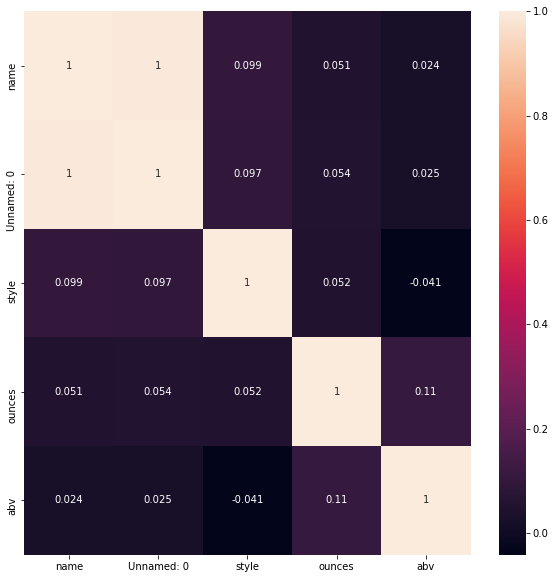

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
df_top_corr = df_new[top_correlation['data'].values]
sns.heatmap(df_top_corr.corr(),annot=True)

In [ ]:
plot = df_1.plot.pie(y='rating', figsize=(5, 5))